In [148]:
#Importing...

import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


#Reading the .mat file

mat_contents = sio.loadmat('E:\Machine Learning\Exercises\machine-learning-ex3\ex3\ex3data1.mat')

mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [149]:
#Taking matrix X and Y
X = mat_contents['X']
print(X)

Y = mat_contents['y']
print(Y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[10]
 [10]
 [10]
 ...
 [ 9]
 [ 9]
 [ 9]]


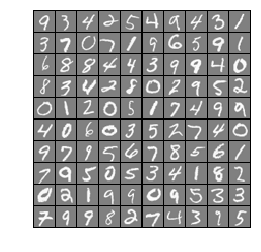

AxesImage(112.68,36;217.44x217.44)
[[-1. -1. -1. ... -1. -1. -1.]
 [-1.  0.  0. ...  0.  0. -1.]
 [-1.  0.  0. ...  0.  0. -1.]
 ...
 [-1.  0.  0. ...  0.  0. -1.]
 [-1.  0.  0. ...  0.  0. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


In [150]:
#VISUALIZING THE DATA

#taking random permutation of the data set
m,n = X.shape
example_width = n**0.5
random = np.random.permutation(m)

#now taking the random 100 data sets
sel = X[random[0:100],:]


#displaying the data
def displayData(X,example_width):
    plt.close()
    plt.figure()
    plt.set_cmap('gray')#setting the color to gray
    
    m,n = X.shape
    
    #taking the height
    example_height = int(n/example_width)
    
    #no. of rows and columns
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols =int(math.ceil(m/display_rows))
    
    pad = 1
    
    display_array = -np.ones((pad + display_rows * (example_height + pad),pad + display_cols * (example_width + pad)))
    
    curr_ex = 1
    
    for i in range(1,display_rows+1):
        for j in range(1,display_cols+1):
            if curr_ex > m:
                break
            
            max_val = max(abs(X[curr_ex-1,:]))
            
            rows = pad + (j - 1) * (example_height + pad) + np.array(range(example_height))
            cols = pad + (i - 1) * (example_width + pad) + np.array(range(example_width))
            
            display_array[rows[0]:rows[-1]+1,cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :],(example_height, example_width),order = 'F') / max_val
            curr_ex += 1
        
        if curr_ex > m:
            break
    
    h = plt.imshow(display_array,vmin = -1,vmax = 1)
    
    plt.axis('off')
    plt.show(block = False)
    
    return h,display_array

a,b = displayData(sel,int(example_width))
print(a)
print(b)


In [151]:
## Setup the parameters you will use for this exercise
input_layer_size  = 400;  # 20x20 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
num_labels = 10;          # 10 labels, from 1 to 10   
                          # (note that we have mapped "0" to label 10)

In [152]:
all_theta = sio.loadmat('E:\Machine Learning\Exercises\machine-learning-ex3\ex3\ex3weights.mat')
theta1 = all_theta['Theta1']

theta2 = all_theta['Theta2']

print(theta1.shape)
print(theta2.shape)

(25, 401)
(10, 26)


In [153]:
#Taking matrix X and Y
X = mat_contents['X']

m,n = X.shape
x0 = [1 for i in range(m)]
                                                                #yha hmne dubara X and Y bna dia becoz we have to add column of 1
X = np.concatenate((np.array(x0).reshape(m,1),X),axis = 1)
print(X.shape)


Y = mat_contents['y']
print(Y)

(5000, 401)
[[10]
 [10]
 [10]
 ...
 [ 9]
 [ 9]
 [ 9]]


In [154]:
def sigmoid(z):
    
    #IF z IA AN ARRAY
    if isinstance(z,np.ndarray):
        temp = np.ones(z.shape)
       
        temp = 1/(1 + np.exp(-z))
        
        return temp
   
    #IF z IS A LIST
    elif isinstance(z,list):
        for i in range(len(z)):
            z[i] = 1/(1 + np.exp(-z[i]))
        return z
    
    #IF z IS A NO.   
    else:
        return 1/(1 + np.exp(-z))

In [157]:
#theta1 or theta2 pass krne pr ab neural networks k through ab hum a matrix bnaynge jiska size (5000,25) hoga iska matlab 
#hidden layer me 25 units hai

def predict(theta1,theta2):
    a = sigmoid(X.dot(theta1.transpose()))#hidden layer
    print(a.shape)
    a0 = np.ones((m,1))#hidden layer me 1 column add kia of ones
    
    a = np.concatenate((a0,a),axis = 1)
    
    
    hypo = sigmoid(a.dot(theta2.transpose()))#it will be a (5000,10) matrix ,ith row its matrix will tell the probabilities of each no.
                                            # with the corresponding element eg. hypo[2999,5] btayga ki X matrix k 2999 data k 6(index+1) hone ki
                                            #probability kitne hai
    return hypo

pred = predict(theta1,theta2)
for i in range(5000):
    print(pred[i].max())

(5000, 25)
0.9957340119861678
0.9956969314041254
0.928008396840682
0.994104073815104
0.9927621608637028
0.9970205976845548
0.9787507031977294
0.8193588855683119
0.988602208637588
0.9506612614475374
0.9711922588081118
0.991432008688133
0.9966810561710592
0.9201654915281374
0.9923911854837074
0.8573066966319474
0.9982431831860855
0.9804386999688083
0.9856355662627542
0.9855409234199857
0.9900084379789
0.9786286245272103
0.9866274194085369
0.8159602374799763
0.925157940395746
0.991593191133801
0.6468204886997683
0.8688921229388107
0.8697159121148093
0.9790323013869746
0.8475130941261741
0.9922264583010083
0.9944792041237787
0.9808977629790374
0.9976030504994936
0.9863036922730755
0.9953438857231689
0.9976327313843628
0.9970680176145581
0.9982471099235578
0.9947451386498631
0.996776574011864
0.9659329296706687
0.9890130678597899
0.9910526239951302
0.9944412826365315
0.996864422539265
0.9665950989407396
0.9923073230163457
0.9535407528656389
0.9957482610415214
0.9719879921531892
0.9935951640

0.9935852729952317
0.9959862437629506
0.958641515035783
0.9957474996087505
0.2948819507664201
0.9988603918739757
0.976565083052465
0.8166698131929068
0.5560042358477034
0.9916783003786249
0.9693400453901302
0.9796701193611267
0.8179524226063771
0.9287275584938518
0.7366345399349581
0.9965498029239193
0.9967493366041399
0.9709320947611043
0.8918724673036765
0.9903360035295709
0.9916278318926276
0.9157206834492657
0.9955213117582242
0.9872638234179708
0.9667966404567414
0.9958948326851096
0.9988042343153857
0.9964578534862182
0.9593892587399452
0.6377120992586481
0.8444229264292459
0.9909465026406244
0.9957461100560349
0.9597296583222441
0.9853610958953657
0.977816138342294
0.9872756845450378
0.9960628803998044
0.9904462579644803
0.9765974664390892
0.981195734584692
0.997161562594285
0.9884771641951026
0.9413070294490371
0.7858371633700871
0.9778849138429615
0.9950261661976059
0.9890020899082926
0.5728109643304135
0.9926516314325915
0.9904909899333573
0.9716265763275487
0.985251833169312

0.9841750063874414
0.987750890244159
0.7091475384117482
0.9744897883133907
0.9918470889953305
0.9920766396435308
0.9621546384709113
0.9926385542760767
0.8843171852558355
0.9285934803564441
0.597187243469009
0.7870854292742285
0.9218591346145273
0.21814488134106047
0.9644411961391536
0.946554128723879
0.5193789958463009
0.9918279272251841
0.870609793266331
0.9342809995896472
0.9676289802919553
0.9950115998548099
0.9495913573016689
0.9722536736871773
0.5873040985862091
0.9950324753961863
0.9668135380666947
0.9822244516118875
0.9906757792117317
0.9841597932750833
0.9493056577421342
0.9957344109162749
0.9563385118339685
0.994971107081032
0.9571107839242639
0.8743293853178405
0.9738028538766551
0.9941508306256563
0.995942957929193
0.8454520812799943
0.9204713321159541
0.9738899139775199
0.3666912159746453
0.9966930527800432
0.9968243013191502
0.9771717897875966
0.9958953964047095
0.9937760655634805
0.9561508426743511
0.9657751408277663
0.9936586572138376
0.9890906844994418
0.993401313549979

0.9912419676140367
0.9747953927754263
0.5410446615635482
0.6375330943101118
0.9863996426510337
0.9329612889141841
0.9723301882636186
0.9901435786180639
0.8934070925199898
0.8910869556380061
0.9618495446416809
0.9914172002447631
0.9899765261765867
0.990055185250589
0.9744266124236367
0.9029245119900481
0.9736592132578278
0.9165576967867253
0.9326726910814673
0.9861559768839699
0.9711442176707618
0.9940464964525765
0.9810311805943364
0.9499892969549941
0.9842805335029303
0.9702059464674521
0.3033188893196066
0.6495545155025243
0.20482317587792223
0.9484514140567107
0.9786403037907001
0.9927894356505104
0.970864808075946
0.982908140053115
0.5981701635266904
0.9687600599204934
0.981726543472254
0.9926809311944643
0.9941592234595762
0.9797328160307892
0.9620469975314431
0.9537259188292498
0.9766748159682616
0.6869357589459933
0.9887451036215291
0.9845057258395257
0.8822582828312665
0.962159921307876
0.9611127489318474
0.9797928179591991
0.9801323359452946
0.9412798001032076
0.96296181769733

0.9925575818691001
0.9496531488305786
0.9914784646705367
0.8430396523735167
0.963921463346283
0.6230367050702295
0.7800818300797766
0.9511516575173478
0.8241311398384713
0.972382346925388
0.9090294113119117
0.702006626160239
0.8661184102316595
0.9501623992066928
0.7248894165629854
0.962769567191281
0.9725246287688982
0.9959478080825795
0.9696363659441116
0.9949960882925678
0.8477478935540123
0.94583618237171
0.9891823018004323
0.9973368976282129
0.8820212660150832
0.9922279367535994
0.6699393397246612
0.6174442575702422
0.996962777976317
0.9984745122659578
0.8970750768191887
0.956646170457367
0.9861423596033081
0.9427608575402184
0.736805532565498
0.9971441835819096
0.9945788344772911
0.9710308787165244
0.8035073241015709
0.9975064346432179
0.9802286899960437
0.9982118609070316
0.9915673742152441
0.9789361182048022
0.9794264006901028
0.9490759076582097
0.9814868418317603
0.9981172884625982
0.9907298789307121
0.9864694092829894
0.748428469778401
0.9967853450205418
0.9586017107131173
0.9

0.9917230785531943
0.9905327368172077
0.988215371366699
0.9193533841193438
0.7613620628311695
0.8032155082840593
0.8417980711495381
0.8698269647549691
0.5837285361168919
0.9069701837973495
0.9745549893161317
0.5354551283626136
0.9711686705562034
0.2562447661600861
0.9842901783003148
0.5245263828018304
0.9837363524814684
0.8481263427094955
0.9746884206664957
0.9459921365089059
0.2966357425038057
0.7531938642360695
0.6889266697391749
0.9556068096647455
0.8165216733629599
0.8207968694838458
0.8893200928508064
0.9270280219206112
0.96395694096631
0.10426334719636192
0.9193116572812265
0.874915849794399
0.4160094465461221
0.9161721599155666
0.7651759607052716
0.8673671512793749
0.8676793786006282
0.98524372157311
0.7141612598955748
0.9646043242796292
0.2499003433987799
0.8781131993970099
0.7949881922910808
0.8514340995665468
0.9446724800544428
0.8439596503014838
0.939622596517916
0.9783165869254277
0.773212946436293
0.38896974526623873
0.8962462203403263
0.9218823595253802
0.938526934498804


In [156]:

count = 0

r,c = pred.shape
print(pred.shape)
for i in range(r):
    
    #ab hmare pas probabilties hai predict variable me hr row ka max element jha hai uska (index+1) no. signify krta hai us
    #row pe jonsa hoga
    if (np.argmax(pred[i])+1)==int(Y[i]):
        count+=1
print(count)

(5000, 10)
4876


In [158]:
#Predicting the percentage accuracy

print("The percentage prediction is : ",count*100/r,' % ')

The percentage prediction is :  97.52  % 
